# Reading in Data

In [1]:
aml.clinical <- read.csv('./AML_clinical_parsed.csv')
aml.clinical$Risk.group <- as.factor(aml.clinical$Risk.group)

expn.de <- read.csv('./AML_Expression_Subset_DE.csv', header=TRUE)
dimnames(expn.de)[[1]] <- expn.de[,1]
expn.de <- expn.de[, -1]

expn <- read.csv('./AML_Expression_Subset.csv', header=TRUE)
dimnames(expn)[[1]] <- expn[,1]
expn <- expn[, -1]
expn <- expn[, colnames(expn) %in% colnames(expn.de)]

install.packages("e1071")
install.packages("glmnet")
install.packages("class")
install.packages("rpart")
install.packages("rpart.plot")

In [38]:
head(aml.clinical)
head(expn.de)
head(expn)
dim(aml.clinical)
dim(expn.de)
dim(expn)

X.1,X,TARGET.USI,Gender,Race,Ethnicity,Age.at.Diagnosis.in.Days,First.Event,Event.Free.Survival.Time.in.Days,Vital.Status,⋯,access,state,data_category,type,experimental_strategy,project.project_id,entity_id,case_id,entity_submitter_id,entity_type
1,0,TARGET-20-PABLDZ,Female,White,Not Hispanic or Latino,2455,Relapse,714,Alive,⋯,open,released,Transcriptome Profiling,gene_expression,RNA-Seq,TARGET-AML,c78f2949-4050-5f14-a401-beddf3ff9f61,1e5c8323-383d-51a0-9199-1b9504b29c7e,TARGET-20-PABLDZ-04A-01R,aliquot
4,3,TARGET-20-PADZCG,Female,Unknown,Not Hispanic or Latino,5325,Relapse,314,Dead,⋯,open,released,Transcriptome Profiling,gene_expression,RNA-Seq,TARGET-AML,1507ac24-8ba2-5e57-a05a-86b5157c8377,c3670ebd-1d43-5491-ac10-a158e12c560b,TARGET-20-PADZCG-09A-02R,aliquot
6,5,TARGET-20-PAEAKL,Female,Black or African American,Not Hispanic or Latino,5218,Relapse,134,Dead,⋯,open,released,Transcriptome Profiling,gene_expression,RNA-Seq,TARGET-AML,9d464669-4fa5-5c48-b1b0-f452bee4682e,55d8f714-482f-50cf-8a23-7d187c31f923,TARGET-20-PAEAKL-09A-03R,aliquot
8,7,TARGET-20-PAEDKB,Male,White,Not Hispanic or Latino,815,Relapse,419,Dead,⋯,open,released,Transcriptome Profiling,gene_expression,RNA-Seq,TARGET-AML,dcc4d9f2-0f77-58ce-8064-f6e12bffa5e7,84200a3f-e28c-5352-a320-30a43985e8c9,TARGET-20-PAEDKB-04A-01R,aliquot
9,8,TARGET-20-PAEERJ,Female,White,Not Hispanic or Latino,5082,Relapse,259,Dead,⋯,open,released,Transcriptome Profiling,gene_expression,RNA-Seq,TARGET-AML,d3e1f044-8745-56e9-a05e-dc95d94dd899,665b2a36-1c80-5a53-824f-dda03c2a0d49,TARGET-20-PAEERJ-04A-01R,aliquot
11,10,TARGET-20-PAEFGR,Female,White,Not Hispanic or Latino,549,Relapse,497,Alive,⋯,open,released,Transcriptome Profiling,gene_expression,RNA-Seq,TARGET-AML,4af4a340-d9c2-5a84-8f1b-c46fdc831ea0,edc9d8d7-af53-5e63-aa24-ceeccc24e8b6,TARGET-20-PAEFGR-09A-02R,aliquot


,TARGET.20.PABLDZ.04A.01R,TARGET.20.PADZCG.09A.02R,TARGET.20.PAEAKL.09A.03R,TARGET.20.PAEDKB.04A.01R,TARGET.20.PAEERJ.09A.01R,TARGET.20.PAEFGR.09A.02R,TARGET.20.PAEFGT.03A.01R,TARGET.20.PAEIKD.04A.01R,TARGET.20.PAKIWK.04A.01R,TARGET.20.PAKIYW.09A.01R,⋯,TARGET.20.PASWPT.09A.01R,TARGET.20.PASXNR.04A.01R,TARGET.20.PASXYG.09A.05R,TARGET.20.PASYJI.04A.02R,TARGET.20.PASZLJ.09A.01R,TARGET.20.PATDHA.09A.01R,TARGET.20.PATDNN.04A.02R,TARGET.20.PATELT.03A.05R,TARGET.20.PATIAK.09A.01R,TARGET.20.PATJHJ.40A.01R
ENSG00000000003.13,6,46,24,38,73,6,61,12,47,25,⋯,19,26,9,34,8,1,4,4,6,1
ENSG00000000971.14,0,856,78,25,949,0,135,35,117,5,⋯,69,69,23,40,14,14,8,29,7,0
ENSG00000001561.6,753,1979,157,3076,6717,194,2257,783,2870,766,⋯,2367,1189,1522,5121,835,2136,886,894,265,36
ENSG00000002586.16,12413,21574,33173,11920,40704,22984,17638,51840,14396,24358,⋯,33645,19117,33918,29158,21308,65577,67318,57626,55399,20447
ENSG00000002933.6,73,317,1001,612,60,76,7,502,421,1813,⋯,1722,302,65,322,4,14604,77,650,1263,3
ENSG00000003436.13,11768,1653,86,395,6238,7546,2728,240,3867,590,⋯,8513,6452,10859,7589,709,10503,238,2303,5530,43


,TARGET.20.PABLDZ.04A.01R,TARGET.20.PADZCG.09A.02R,TARGET.20.PAEAKL.09A.03R,TARGET.20.PAEDKB.04A.01R,TARGET.20.PAEERJ.09A.01R,TARGET.20.PAEFGR.09A.02R,TARGET.20.PAEFGT.03A.01R,TARGET.20.PAEIKD.04A.01R,TARGET.20.PAKIWK.04A.01R,TARGET.20.PAKIYW.09A.01R,⋯,TARGET.20.PASWPT.09A.01R,TARGET.20.PASXNR.04A.01R,TARGET.20.PASXYG.09A.05R,TARGET.20.PASYJI.04A.02R,TARGET.20.PASZLJ.09A.01R,TARGET.20.PATDHA.09A.01R,TARGET.20.PATDNN.04A.02R,TARGET.20.PATELT.03A.05R,TARGET.20.PATIAK.09A.01R,TARGET.20.PATJHJ.40A.01R
ENSG00000000003.13,6,46,24,38,73,6,61,12,47,25,⋯,19,26,9,34,8,1,4,4,6,1
ENSG00000000005.5,1,1,3,1,0,0,0,0,0,0,⋯,1,0,0,4,0,0,0,0,0,0
ENSG00000000419.11,2609,2028,1666,5624,2265,1926,1606,1570,4357,1717,⋯,3315,2376,2784,4548,3234,3403,2186,2301,2741,1382
ENSG00000000457.12,507,2126,337,1017,1460,380,335,317,478,433,⋯,1189,316,742,1342,1381,393,548,1437,405,235
ENSG00000000460.15,57,847,567,331,307,77,77,497,861,486,⋯,296,526,488,337,1083,329,297,709,411,273
ENSG00000000938.11,883,13657,33405,8003,6268,3406,816,5721,3042,22050,⋯,3300,6469,662,19974,3469,943,23320,2919,7042,636


[1] 148  85

[1] 1998  148

[1] 60483   148

In [3]:
table.accuracy <- data.frame()

# kNN with Feature Selection and 12 neighbors

In [4]:
library(class)
# variable for iterating through fold
multiple <- round(nrow(aml.clinical) / 10)
for (col in 1:nrow(aml.clinical)) {
    # create holder variable for total probabilities
    total.probs <- vector(length=3)
    for (i in 1:3) {
        # create sample selection, set up fold probability storage vector
        indices <- sample(seq_len(nrow(aml.clinical)), replace=F)
        probs <- vector(length=10)
        for (j in 0:9) {
            # set up training and test set using given indices and fold number
            test.indices <- indices[((multiple * j) + 1):min((multiple * (j+1)), nrow(aml.clinical))]
            train.set <- expn.de[,-test.indices]
            test.set <- expn.de[,test.indices]
            
            # perform kNN on a test set using the training set
            ret.knn <- knn (train=t(train.set), test=t(test.set), cl=aml.clinical$Risk.group[-test.indices], k=12)
            
            # calculate percentage correct of test set
            tbl <- table (ret.knn, cl=aml.clinical$Risk.group[test.indices])
            if (dim(tbl)[2] == 1) {
                probs[j+1] <- tbl[1,1] / sum(tbl)
            } else {
                probs[j+1] <- (tbl[1,1] + tbl[2,2]) / sum(tbl)
            }
        }
        # calculate fold probability average
        total.probs[i] <- mean(probs)
    }
    # calculate total probability average
    table.accuracy[col, "knn.12.de"] <- round(mean(total.probs) * 100, 2)
}

In [5]:
mean(table.accuracy$knn.12.de)

[1] 76.10318

In [36]:
plot(ret.knn, aml.clinical$Risk.group[test.indices])

ERROR: Error in table(x, y): all arguments must have the same length


# kNN without feature selection with 12 neighbors

In [93]:
library(class)
# variable for iterating through fold
multiple <- round(nrow(aml.clinical) / 10)
for (col in 1:nrow(aml.clinical)) {
    # create holder variable for total probabilities
    total.probs <- vector(length=3)
    for (i in 1:3) {
        # create sample selection, set up fold probability storage vector
        indices <- sample(seq_len(nrow(aml.clinical)), replace=F)
        probs <- vector(length=10)
        for (j in 0:9) {
            # set up training and test set using given indices and fold number
            test.indices <- indices[((multiple * j) + 1):min((multiple * (j+1)), nrow(aml.clinical))]
            train.set <- expn[,-test.indices]
            
            test.set <- expn[,test.indices]
            
            # perform kNN on a test set using the training set
            ret.knn <- knn (train=t(train.set), test=t(test.set), cl=aml.clinical$Risk.group[-test.indices], k=12)
            
            # calculate percentage correct of test set
            tbl <- table (ret.knn, cl=aml.clinical$Risk.group[test.indices])
            print(tbl)
            if (dim(tbl)[2] == 1) {
                probs[j+1] <- tbl[1,1] / sum(tbl)
            } else {
                probs[j+1] <- (tbl[1,1] + tbl[2,2]) / sum(tbl)
            }
        }
        # calculate fold probability average
        total.probs[i] <- mean(probs)
    }
    # calculate total probability average
    table.accuracy[col, "knn.12"] <- round(mean(total.probs) * 100, 2)
}

In [32]:
mean(table.accuracy$knn.12)

[1] 60.49243

# Ridge Regression with Feature Selection

In [25]:
library(glmnet)
# variable for iterating through fold
multiple <- round(nrow(aml.clinical) / 10)
for (col in 1:nrow(aml.clinical)) {
    # create holder variable for total probabilities
    total.probs <- vector(length=3)
    for (i in 1:3) {
        # create sample selection, set up fold probability storage vector
        indices <- sample(seq_len(nrow(aml.clinical)), replace=F)
        probs <- vector(length=10)
        for (j in 0:9) {
            # set up training and test set using given indices and fold number
            test.indices <- indices[((multiple * j) + 1):min((multiple * (j+1)), nrow(aml.clinical))]
            train.set <- expn.de[,-test.indices]
            
            test.set <- expn.de[,test.indices]
            
            
            glm.fit <- cv.glmnet (t(train.set), aml.clinical$Risk.group[-test.indices], alpha=0, family="binomial", 
                                  type.measure = "class")
            
            pred <- predict(glm.fit, t(test.set), type="class")
            
            # calculate percentage correct of test set
            tbl <- table (pred, cl=aml.clinical$Risk.group[test.indices])
            if (dim(tbl)[1] == 1) {
                probs[j+1] <- tbl[1,1] / sum(tbl)
            } else {
                probs[j+1] <- (tbl[1,1] + tbl[2,2]) / sum(tbl)
            }
        }
        # calculate fold probability average
        total.probs[i] <- mean(probs)
    }
    # calculate total probability average
    table.accuracy[col, "rr.de"] <- round(mean(total.probs) * 100, 2)
}

In [27]:
mean(table.accuracy$rr.de)

[1] 88.20797

# Elastic Net at Alpha=.2 with Feature Selection

In [7]:
library(glmnet)
# variable for iterating through fold
multiple <- round(nrow(aml.clinical) / 10)
for (col in 1:nrow(aml.clinical)) {
    # create holder variable for total probabilities
    total.probs <- vector(length=3)
    for (i in 1:3) {
        # create sample selection, set up fold probability storage vector
        indices <- sample(seq_len(nrow(aml.clinical)), replace=F)
        probs <- vector(length=10)
        for (j in 0:9) {
            # set up training and test set using given indices and fold number
            test.indices <- indices[((multiple * j) + 1):min((multiple * (j+1)), nrow(aml.clinical))]
            train.set <- expn.de[,-test.indices]
            
            test.set <- expn.de[,test.indices]
            
            
            glm.fit <- cv.glmnet (t(train.set), aml.clinical$Risk.group[-test.indices], alpha=.2, family="binomial", 
                                  type.measure = "class")
            
            pred <- predict(glm.fit, t(test.set), type="class")
            
            # calculate percentage correct of test set
            tbl <- table (pred, cl=aml.clinical$Risk.group[test.indices])
            if (dim(tbl)[1] == 1) {
                probs[j+1] <- tbl[1,1] / sum(tbl)
            } else {
                probs[j+1] <- (tbl[1,1] + tbl[2,2]) / sum(tbl)
            }
        }
        # calculate fold probability average
        total.probs[i] <- mean(probs)
    }
    # calculate total probability average
    table.accuracy[col, "en.de.2"] <- round(mean(total.probs) * 100, 2)
}

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



In [8]:
mean(table.accuracy$en.de.2)

[1] 88.00966

# Elastic Net at Alpha = .5 with Feature Selection

In [9]:
library(glmnet)
# variable for iterating through fold
multiple <- round(nrow(aml.clinical) / 10)
for (col in 1:nrow(aml.clinical)) {
    # create holder variable for total probabilities
    total.probs <- vector(length=3)
    for (i in 1:3) {
        # create sample selection, set up fold probability storage vector
        indices <- sample(seq_len(nrow(aml.clinical)), replace=F)
        probs <- vector(length=10)
        for (j in 0:9) {
            # set up training and test set using given indices and fold number
            test.indices <- indices[((multiple * j) + 1):min((multiple * (j+1)), nrow(aml.clinical))]
            train.set <- expn.de[,-test.indices]
            
            test.set <- expn.de[,test.indices]
            
            
            glm.fit <- cv.glmnet (t(train.set), aml.clinical$Risk.group[-test.indices], alpha=.5, family="binomial", 
                                  type.measure = "class")
            
            pred <- predict(glm.fit, t(test.set), type="class")
            
            # calculate percentage correct of test set
            tbl <- table (pred, cl=aml.clinical$Risk.group[test.indices])
            if (dim(tbl)[1] == 1) {
                probs[j+1] <- tbl[1,1] / sum(tbl)
            } else {
                probs[j+1] <- (tbl[1,1] + tbl[2,2]) / sum(tbl)
            }
        }
        # calculate fold probability average
        total.probs[i] <- mean(probs)
    }
    # calculate total probability average
    table.accuracy[col, "en.de.5"] <- round(mean(total.probs) * 100, 2)
}

In [10]:
mean(table.accuracy$en.de.5)

[1] 87.67696

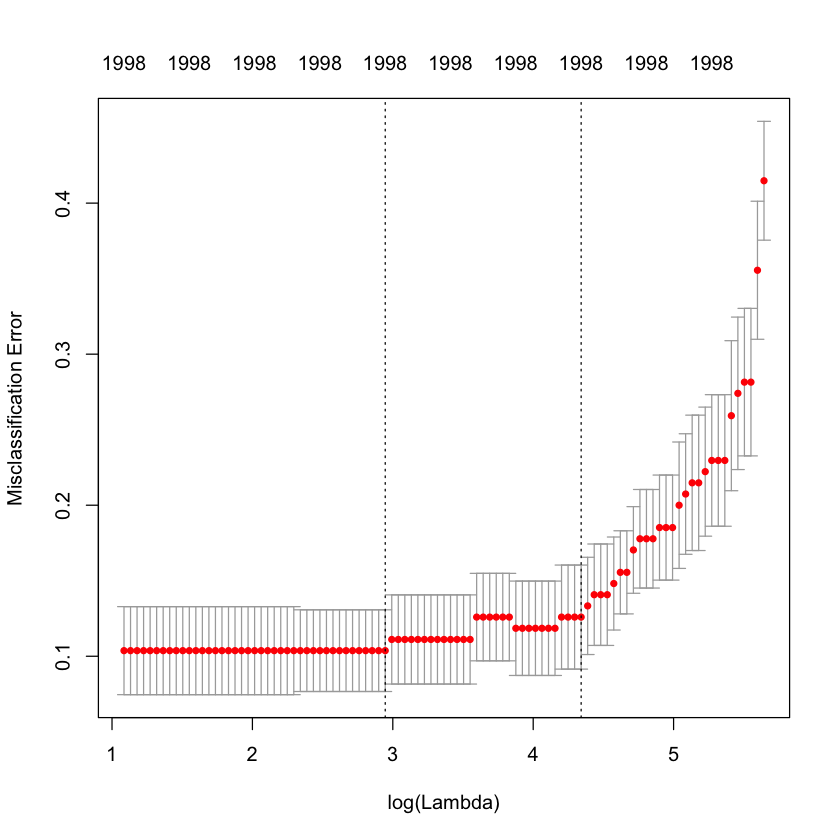

In [35]:
plot(glm.fit)

# Naive Bayes with Feature Selection

In [11]:
library(e1071)
# variable for iterating through fold
multiple <- round(nrow(aml.clinical) / 10)
for (col in 1:nrow(aml.clinical)) {
    # create holder variable for total probabilities
    total.probs <- vector(length=3)
    for (i in 1:3) {
        # create sample selection, set up fold probability storage vector
        indices <- sample(seq_len(nrow(aml.clinical)), replace=F)
        probs <- vector(length=10)
        for (j in 0:9) {
            # set up training and test set using given indices and fold number
            test.indices <- indices[((multiple * j) + 1):min((multiple * (j+1)), nrow(aml.clinical))]
            train.set <- expn.de[,-test.indices]
            
            test.set <- expn.de[,test.indices]
            
            
            glm.fit <- naiveBayes (t(train.set), aml.clinical$Risk.group[-test.indices])
            
            pred <- predict(glm.fit, t(test.set), type="class")
            
            # calculate percentage correct of test set
            tbl <- table (pred, cl=aml.clinical$Risk.group[test.indices])
            if (dim(tbl)[1] == 1) {
                probs[j+1] <- tbl[1,1] / sum(tbl)
            } else {
                probs[j+1] <- (tbl[1,1] + tbl[2,2]) / sum(tbl)
            }
        }
        # calculate fold probability average
        total.probs[i] <- mean(probs)
    }
    # calculate total probability average
    table.accuracy[col, "nb.de"] <- round(mean(total.probs) * 100, 2)
}

In [12]:
mean(table.accuracy$nb.de)

[1] 90.7152

# Naive Bayes with Feature Selection and Laplace = 2

In [13]:
library(e1071)
# variable for iterating through fold
multiple <- round(nrow(aml.clinical) / 10)
for (col in 1:nrow(aml.clinical)) {
    # create holder variable for total probabilities
    total.probs <- vector(length=3)
    for (i in 1:3) {
        # create sample selection, set up fold probability storage vector
        indices <- sample(seq_len(nrow(aml.clinical)), replace=F)
        probs <- vector(length=10)
        for (j in 0:9) {
            # set up training and test set using given indices and fold number
            test.indices <- indices[((multiple * j) + 1):min((multiple * (j+1)), nrow(aml.clinical))]
            train.set <- expn.de[,-test.indices]
            
            test.set <- expn.de[,test.indices]
            
            
            glm.fit <- naiveBayes (t(train.set), aml.clinical$Risk.group[-test.indices], laplace = 2)
            
            pred <- predict(glm.fit, t(test.set), type="class")
            
            # calculate percentage correct of test set
            tbl <- table (pred, cl=aml.clinical$Risk.group[test.indices])
            if (dim(tbl)[1] == 1) {
                probs[j+1] <- tbl[1,1] / sum(tbl)
            } else {
                probs[j+1] <- (tbl[1,1] + tbl[2,2]) / sum(tbl)
            }
        }
        # calculate fold probability average
        total.probs[i] <- mean(probs)
    }
    # calculate total probability average
    table.accuracy[col, "nb.de.2"] <- round(mean(total.probs) * 100, 2)
}

In [14]:
mean(table.accuracy$nb.de.2)

[1] 90.75291

# Decision Tree

Warning message:
“Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE.”Warning message:
“Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE.”

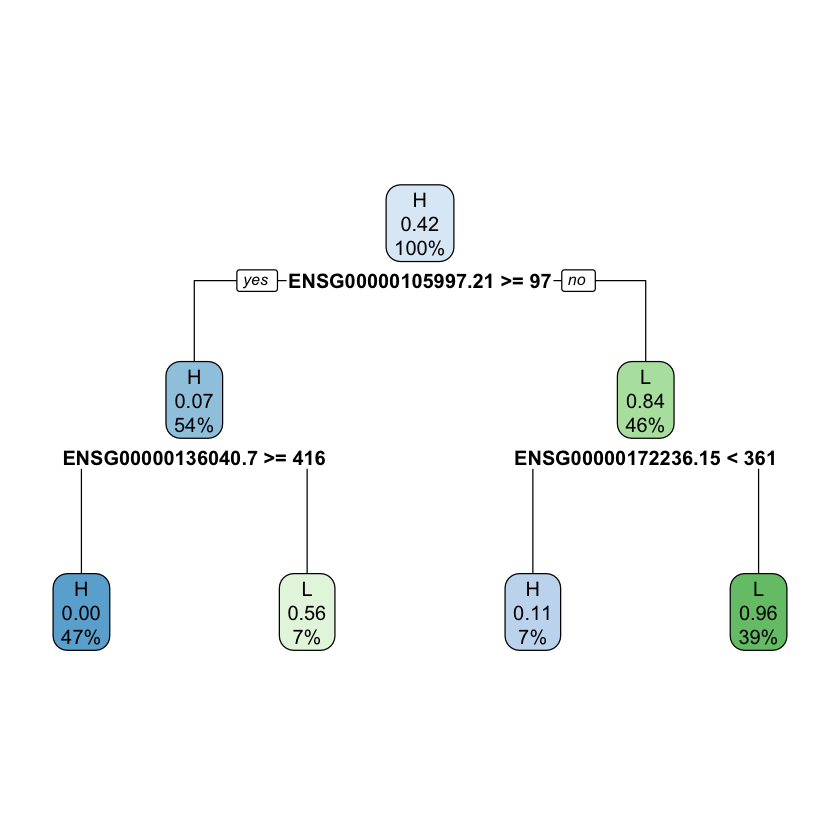

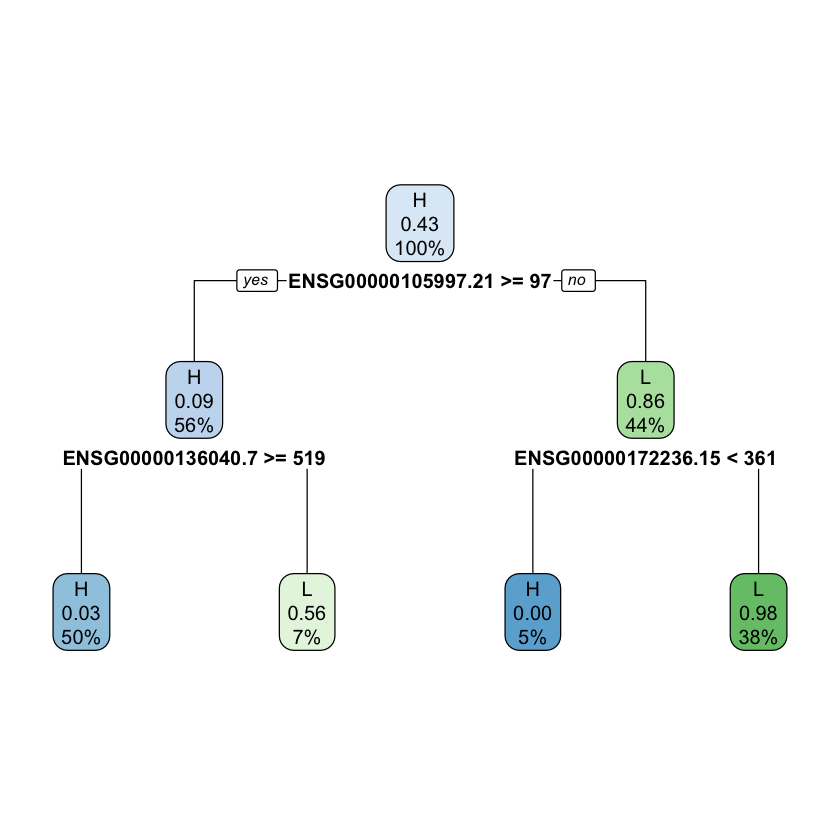

In [30]:
library(rpart)
library(rpart.plot)
# variable for iterating through fold
multiple <- round(nrow(aml.clinical) / 10)
for (col in 1:nrow(aml.clinical)) {
    # create holder variable for total probabilities
    total.probs <- vector(length=3)
    for (i in 1:3) {
        # create sample selection, set up fold probability storage vector
        indices <- sample(seq_len(nrow(aml.clinical)), replace=F)
        probs <- vector(length=10)
        for (j in 0:9) {
            # set up training and test set using given indices and fold number
            test.indices <- indices[((multiple * j) + 1):min((multiple * (j+1)), nrow(aml.clinical))]
            train.set <- expn.de[,-test.indices]
            test.set <- expn.de[,test.indices]
            
            dt.fit <- rpart (aml.clinical$Risk.group[-test.indices] ~ ., data=as.data.frame(t(train.set)))
            
            pred <- predict(dt.fit, as.data.frame(t(test.set)), type="class")
            
            # calculate percentage correct of test set
            tbl <- table (pred, cl=aml.clinical$Risk.group[test.indices])
            if (dim(tbl)[1] == 1) {
                probs[j+1] <- tbl[1,1] / sum(tbl)
            } else {
                probs[j+1] <- (tbl[1,1] + tbl[2,2]) / sum(tbl)
            }
        }
        # calculate fold probability average
        total.probs[i] <- mean(probs)
    }
    # calculate total probability average
    table.accuracy[col, "dt.de"] <- round(mean(total.probs) * 100, 2)
}

In [24]:
mean(table.accuracy$dt.de)

[1] 82.54459

Warning message:
“Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE.”

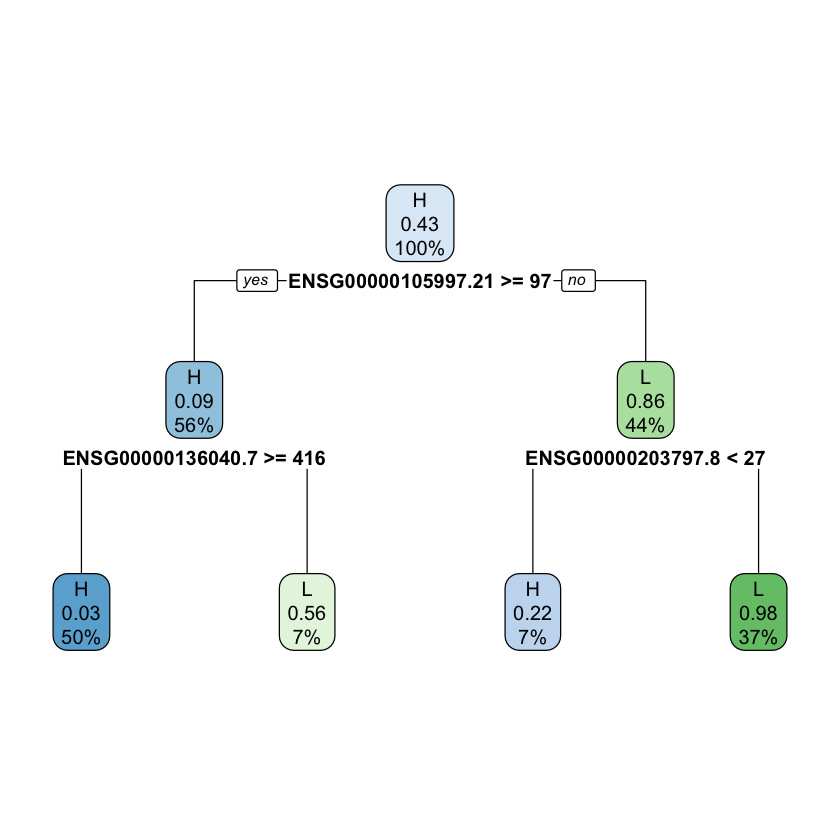

In [28]:
library(rpart.plot)
rpart.plot(dt.fit)

In [32]:
write.csv(table.accuracy, "table.accuracy.csv")